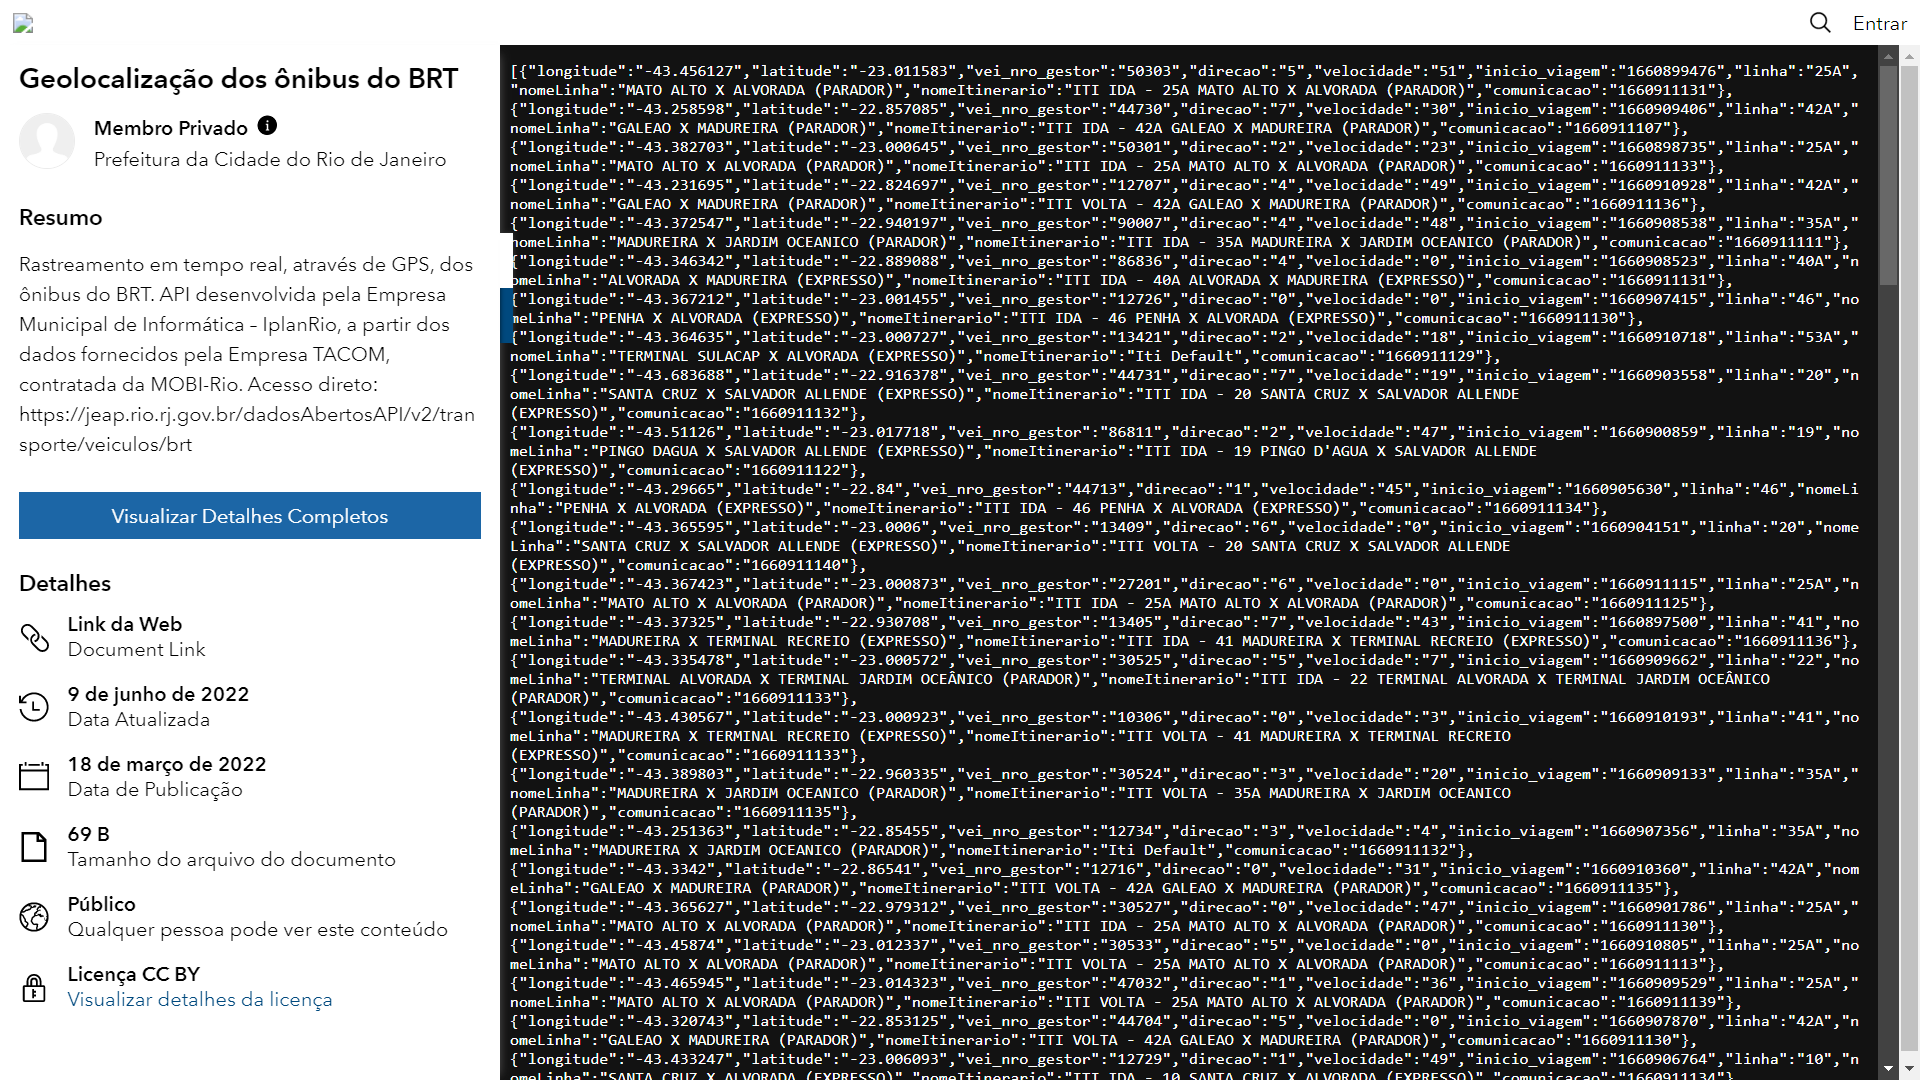

A tabela dos dados se encontra [AQUI](https://www.data.rio/documents/PCRJ::geolocaliza%C3%A7%C3%A3o-dos-%C3%B4nibus-do-brt/explore)

<h1>Pegando dados de uma lista com pontos X e Y</h1>

<p>O objetivo desde tutorial é pegar um dado estruturado como json, com pontos X e Y, e converter de FeatureClass para FeatureLayer, dar o update, delete, insert e append</p>

<h2>* Passo 1</h2>

<h3>Devemos fazer toda a configuração do ambiente.</h3>

Devemos entender que o Jupyter Lab é um ambiente de desenvolvimento interativo que roda no navegador web e permite editar e executar código em mais de 40 linguagens de programação diferentes, incluindo Python. Para ser usado é necessário instalar o Python, além da distribuição Anaconda. A distribuição Anaconda instala o Python, 250 bibliotecas e um gerenciador de ambiente capaz de baixar muitos pacotes de código aberto.

### Para configurar o Python em CMD, primeiramente deve estar com o ArcGisPro instalado e clonar o ambiente. Somente use o ambiente clonado.
1. Pelo ArcGisPro

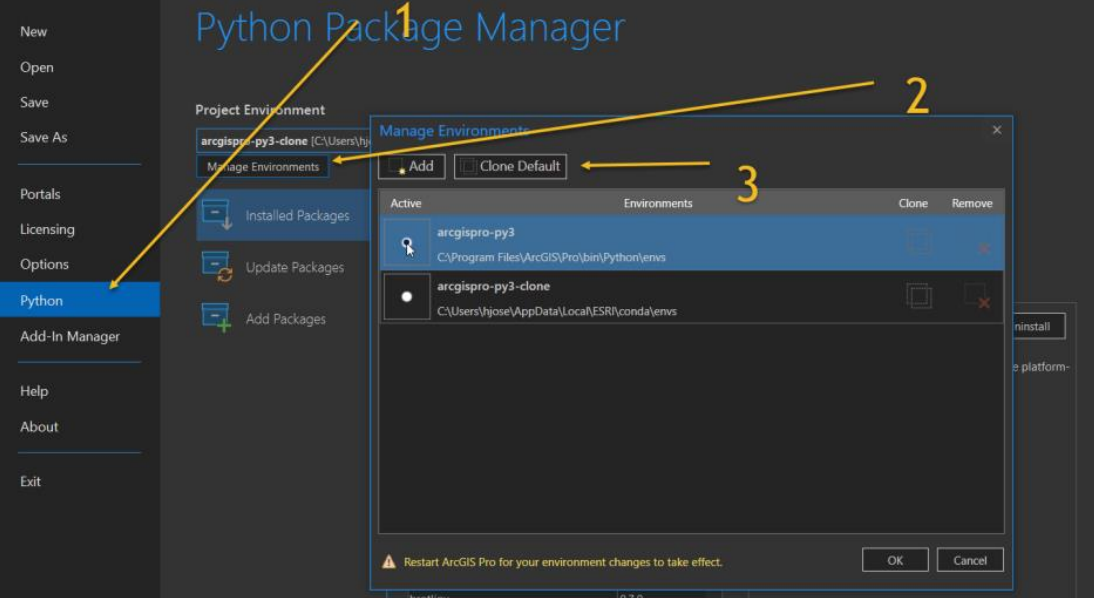

2. Se ocorrer erro ao clonar pelo software. Faça o clone manual:
>conda info --envs

3. Veja o ambiente que quer clonar, se quiser delete o ambiente que falhou a clonagem:
> conda env remove -n arcgispro-py3-clone

4. Crie o ambiente baseado no ambiente que quer clonar:
> conda create --clone arcgispro-py3 --name arcgispro-py3-clone

<span style="background-color:red; border-radius:4px; padding:2px">OBS:</span> Não esqueça de ativar seu ambiente. Ao abrir o software podemos ver pelo active quem está 
selecionado.

* Não esqueça de clonar seu ambiente e o ativar, se necessário as etapas acima estão detalhadas no passo a passo oficial, encontrado [AQUI](https://developers.arcgis.com/python/guide/install-and-set-up/).

* Após setarmos o ambiente devemos configurar o JupyterLab, o passo a passo oficial pode ser encontrado [AQUI](https://developers.arcgis.com/python/guide/using-the-jupyter-lab-environment/).

### Configurando JupyterLab
* Instale o nodejs pelo o msi encontrado [AQUI](https://nodejs.org/download/release/v14.6.0/) ou através do chocolatey encontrado [AQUI](https://chocolatey.org/install) e siga os passos descritos no site oficial.

* Nodejs v14.6.9 foi usado na data de criação deste tutorial. Se desejar testar outra versão procure pelo link oficial encontrado [AQUI](https://nodejs.org/en/download/releases/).

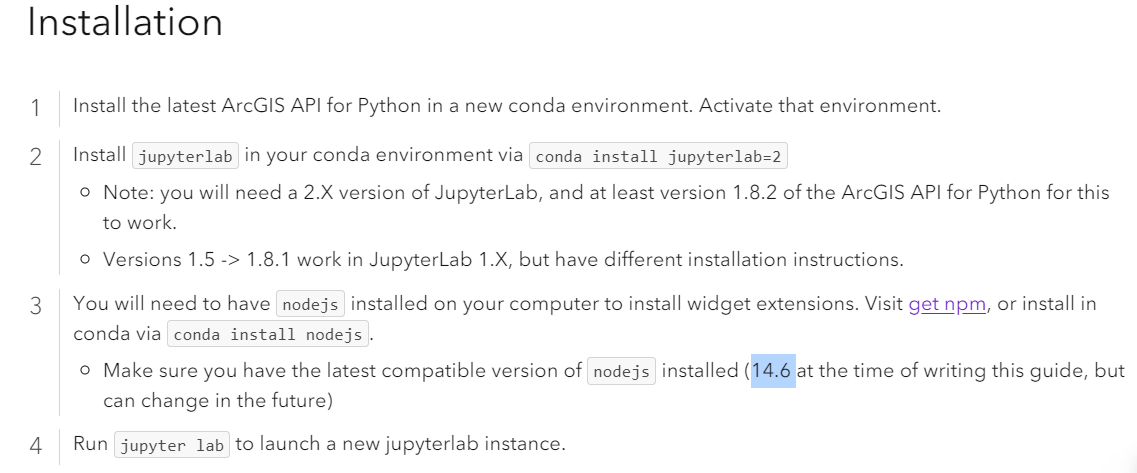

Após instalação, abra o Python command prompt e execute o seguinte comando:

* Para visualizar sua versão do arcgis digite na linha de comando: 

>conda list arcgis

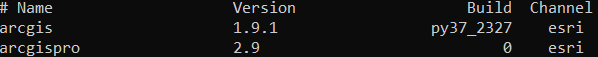

Após isto instale as extensões do JupyterLab:

* instale o jupyterlab-manager e o arcgis-map-ipywidget

>jupyter labextension install @jupyter-widgets/jupyterlab-manager

><pre>jupyter labextension install arcgis-map-ipywidget@1.9.1</pre>

<span style="background-color:red; border-radius:4px; padding:2px">OBS:</span> após o @ipywidget a versão deve corresponder a sua versão do arcgis do seu ambiente, checado na etapa anterior.

* Após instalar as extensões é necessário dar o Build, com o seguinte comando:
> jupyter lab build

* Para abrir o jupyterlab digite:
> jupyter lab

* Ou poderá criar um atalho no Desktop
1. Primeiro clique com o botão direito na sua área de trabalho e vá em novo. Será aberto uma janela onde deverá colocar o seguinte comando:

>%LocalAppData%\ESRI\conda\envs\arcgispro-py3-clone\python.exe %LocalAppData%\ESRI\conda\envs\arcgispro-py3-clone\Scripts\jupyter-lab-script.py

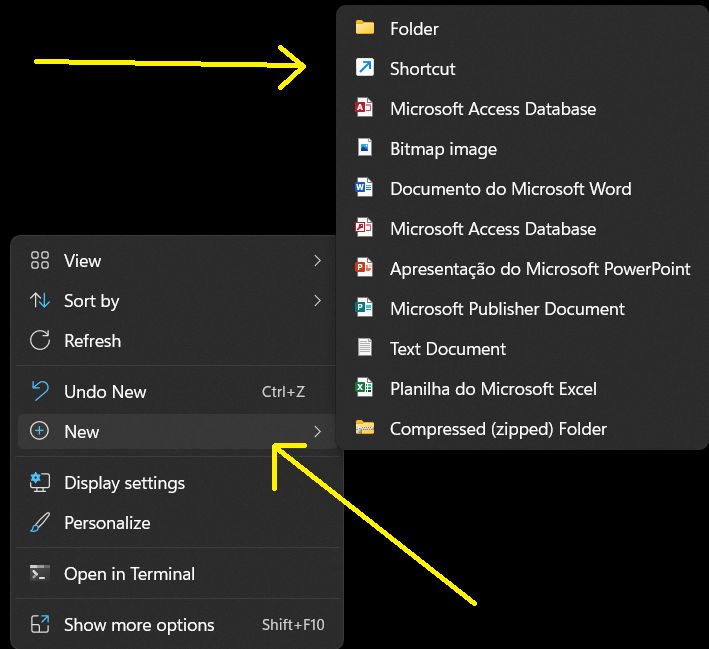

<span style="background-color:red; border-radius:4px; padding:2px">OBS:</span> Após criar o atalho, clique com o botão direito no mesmo e vá em propriedades, na área Iniciar em: Coloque o caminho da pasta onde deseja que o jupyterlab inicie.

EX: "C:\Users\Documentos"

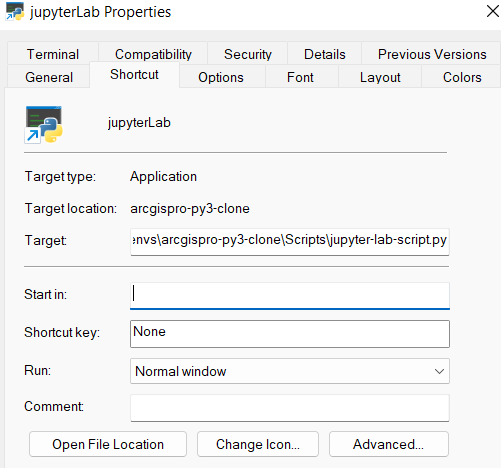

* Abrindo o jupyterlab pela primeira vez, é necessário habilitar as extensões. Clique no símbolo de Quebra-cabeça e depois em Enable.

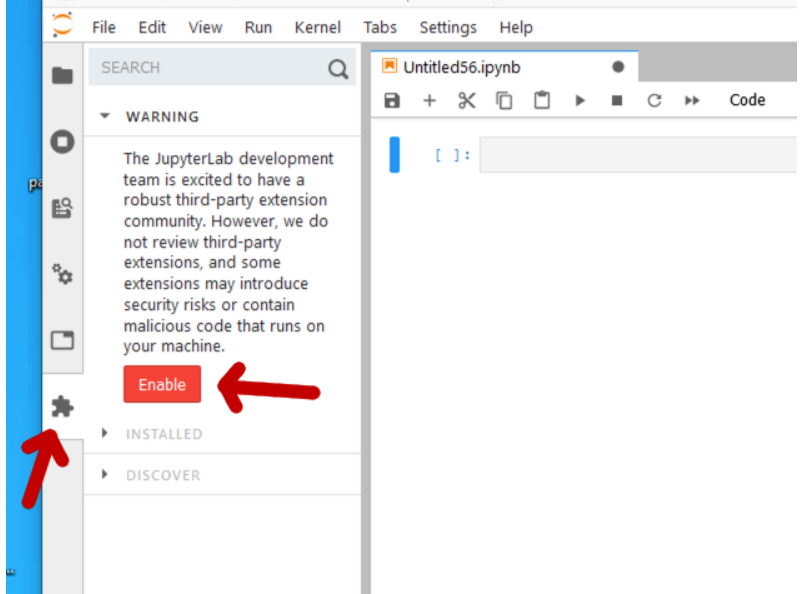

<h3>Configuração do ambiente com os devidos imports</h3>

Dos imports usados neste tutorial o arrow é o único necessário ser instalado.
* A Arrow é uma biblioteca que auxilia no uso de datas e horas. Com ela é possível criar, alterar, remover e converter datas e horas, de forma muito mais fácil e rápida, utilizando muito menos código do que seria necessário para trabalhar com esses dados. Confira a documentação [AQUI](https://pypi.org/project/arrow/)

* Para instalar o arrow, abra o Python command prompt e execute o seguinte comando:
>pip install -U arrow

* Importamos a Biblioteca do pandas e apelidamos de pd com prefixo 'as'. Para facilitar seu uso. Sua documentação se encontra [AQUI](https://pandas.pydata.org/docs/index.html)

* O módulo datetime fornece manipulação de datas e horários. Confira a sua documentação [AQUI](https://docs.python.org/3/library/datetime.html)

* O Módulo GIS, que representa o GIS com o que você está trabalhando, seja ArcGIS Online ou uma instância da ArcGIS Enterprise. O objeto do módulo é o mais importante ao trabalhar com a API ArcGIS para Python. Sua documentação esta [AQUI](https://developers.arcgis.com/python/guide/using-the-gis/)

* O Geoaccessor é uma classe fundamental para adicionar namespace ao pandas (df.spatial) e realizar operações espaciais como visualização e indexação espacial. Sua documentação se encontra [AQUI](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#geoaccessor)

* O IPython.display junto com o JSON permite visualizar de uma forma mais interessante as ferramentas do Python.

In [1]:
import arrow
import pandas as pd
import datetime
import os
import arcpy
from arcgis.gis import GIS
from arcgis.features import GeoAccessor
from IPython.display import JSON
gis = GIS('PRO')

* Exemplo de Visualização do ipython.display:

In [2]:
json_dict = {"my data":{1:"this", 2:"is", 3:"a", 4:"test"}}
display(JSON(json_dict, expanded=True))

<IPython.core.display.JSON object>

<h2>* Passo 2</h2>

<h3>Lendo a tabela e a transformando em DataFrame</h3>

A tabela dos dados se encontra [AQUI](https://www.data.rio/documents/PCRJ::geolocaliza%C3%A7%C3%A3o-dos-%C3%B4nibus-do-brt/explore)

In [3]:
pasta = os.path.abspath('.') # Usa pasta atual

In [4]:
tabela = pd.read_json(os.path.join(pasta, 'dados.json')) # Lemos o arquivo e atribuidos a variável tabela

In [5]:
tabela.dtypes # verificação dos tipos

longitude         float64
latitude          float64
vei_nro_gestor      int64
direcao             int64
velocidade          int64
inicio_viagem       int64
linha              object
nomeLinha          object
nomeItinerario     object
comunicacao         int64
dtype: object

In [6]:
tabela.head() # análise dos dados iniciais

,longitude,latitude,vei_nro_gestor,direcao,velocidade,inicio_viagem,linha,nomeLinha,nomeItinerario,comunicacao
0,-43.456127,-23.011583,50303,5,51,1660899476,25A,MATO ALTO X ALVORADA (PARADOR),ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR),1660911131
1,-43.258598,-22.857085,44730,7,30,1660909406,42A,GALEAO X MADUREIRA (PARADOR),ITI IDA - 42A GALEAO X MADUREIRA (PARADOR),1660911107
2,-43.382703,-23.000645,50301,2,23,1660898735,25A,MATO ALTO X ALVORADA (PARADOR),ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR),1660911133
3,-43.231695,-22.824697,12707,4,49,1660910928,42A,GALEAO X MADUREIRA (PARADOR),ITI VOLTA - 42A GALEAO X MADUREIRA (PARADOR),1660911136
4,-43.372547,-22.940197,90007,4,48,1660908538,35A,MADUREIRA X JARDIM OCEANICO (PARADOR),ITI IDA - 35A MADUREIRA X JARDIM OCEANICO (PAR...,1660911111


<h2>* Passo 3</h2>

<h3>Pegaremos nossa tabela e escolhemos as colunas 'inicio_viagem' e 'comunicacao' para transformar e formatar seu datetime através do uso da biblioteca arrow e de seus métodos.</h3>

In [7]:
tabela.inicio_viagem = tabela.inicio_viagem.map(lambda x: arrow.get(x).datetime.replace(tzinfo=None))
tabela.comunicacao = tabela.comunicacao.map(lambda x: arrow.get(x).datetime.replace(tzinfo=None))

In [8]:
tabela.dtypes # Observe que os formatos dos dados das colunas escolhidas, mudaram para datetime64[ns]

longitude                float64
latitude                 float64
vei_nro_gestor             int64
direcao                    int64
velocidade                 int64
inicio_viagem     datetime64[ns]
linha                     object
nomeLinha                 object
nomeItinerario            object
comunicacao       datetime64[ns]
dtype: object

In [9]:
tabela.head() # Perceba que os dados do Data das colunas escolhidas foram formatados e ficaram com um aspecto mais fácil de se entender.

,longitude,latitude,vei_nro_gestor,direcao,velocidade,inicio_viagem,linha,nomeLinha,nomeItinerario,comunicacao
0,-43.456127,-23.011583,50303,5,51,2022-08-19 08:57:56,25A,MATO ALTO X ALVORADA (PARADOR),ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR),2022-08-19 12:12:11
1,-43.258598,-22.857085,44730,7,30,2022-08-19 11:43:26,42A,GALEAO X MADUREIRA (PARADOR),ITI IDA - 42A GALEAO X MADUREIRA (PARADOR),2022-08-19 12:11:47
2,-43.382703,-23.000645,50301,2,23,2022-08-19 08:45:35,25A,MATO ALTO X ALVORADA (PARADOR),ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR),2022-08-19 12:12:13
3,-43.231695,-22.824697,12707,4,49,2022-08-19 12:08:48,42A,GALEAO X MADUREIRA (PARADOR),ITI VOLTA - 42A GALEAO X MADUREIRA (PARADOR),2022-08-19 12:12:16
4,-43.372547,-22.940197,90007,4,48,2022-08-19 11:28:58,35A,MADUREIRA X JARDIM OCEANICO (PARADOR),ITI IDA - 35A MADUREIRA X JARDIM OCEANICO (PAR...,2022-08-19 12:11:51


<h3>Abaixo modificaremos para a datetime do Brasil de +3h. Usando o shift(hours=3)</h3>

In [10]:
tabela.inicio_viagem = tabela.inicio_viagem.map(lambda x: arrow.get(x).shift(hours=3).datetime.replace(tzinfo=None))
tabela.comunicacao = tabela.comunicacao.map(lambda x: arrow.get(x).shift(hours=3).datetime.replace(tzinfo=None))

In [11]:
tabela.head() # Observe que o horário foi modificado

,longitude,latitude,vei_nro_gestor,direcao,velocidade,inicio_viagem,linha,nomeLinha,nomeItinerario,comunicacao
0,-43.456127,-23.011583,50303,5,51,2022-08-19 11:57:56,25A,MATO ALTO X ALVORADA (PARADOR),ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR),2022-08-19 15:12:11
1,-43.258598,-22.857085,44730,7,30,2022-08-19 14:43:26,42A,GALEAO X MADUREIRA (PARADOR),ITI IDA - 42A GALEAO X MADUREIRA (PARADOR),2022-08-19 15:11:47
2,-43.382703,-23.000645,50301,2,23,2022-08-19 11:45:35,25A,MATO ALTO X ALVORADA (PARADOR),ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR),2022-08-19 15:12:13
3,-43.231695,-22.824697,12707,4,49,2022-08-19 15:08:48,42A,GALEAO X MADUREIRA (PARADOR),ITI VOLTA - 42A GALEAO X MADUREIRA (PARADOR),2022-08-19 15:12:16
4,-43.372547,-22.940197,90007,4,48,2022-08-19 14:28:58,35A,MADUREIRA X JARDIM OCEANICO (PARADOR),ITI IDA - 35A MADUREIRA X JARDIM OCEANICO (PAR...,2022-08-19 15:11:51


<h3>Abaixo adicionaremos 2 colunas referentes aos dates 'inicio_viagem' e 'comunicacao', formatadas no Padrão DD/MM/YYYY</h3>

In [12]:
tabela['format_inicio'] = tabela.inicio_viagem.map(lambda x: arrow.get(x).format('DD/MM/YYYY')) # Nova coluna formatada format_inicio
tabela['format_comunicacao'] = tabela.comunicacao.map(lambda x: arrow.get(x).format('DD/MM/YYYY')) # Nova coluna formatada format_comunicacao

In [13]:
tabela.dtypes # Observe que o formato das novas colunas são do tipo objeto. 

longitude                    float64
latitude                     float64
vei_nro_gestor                 int64
direcao                        int64
velocidade                     int64
inicio_viagem         datetime64[ns]
linha                         object
nomeLinha                     object
nomeItinerario                object
comunicacao           datetime64[ns]
format_inicio                 object
format_comunicacao            object
dtype: object

In [14]:
tabela.head() # Visualização das novas colunas implementadas

,longitude,latitude,vei_nro_gestor,direcao,velocidade,inicio_viagem,linha,nomeLinha,nomeItinerario,comunicacao,format_inicio,format_comunicacao
0,-43.456127,-23.011583,50303,5,51,2022-08-19 11:57:56,25A,MATO ALTO X ALVORADA (PARADOR),ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR),2022-08-19 15:12:11,19/08/2022,19/08/2022
1,-43.258598,-22.857085,44730,7,30,2022-08-19 14:43:26,42A,GALEAO X MADUREIRA (PARADOR),ITI IDA - 42A GALEAO X MADUREIRA (PARADOR),2022-08-19 15:11:47,19/08/2022,19/08/2022
2,-43.382703,-23.000645,50301,2,23,2022-08-19 11:45:35,25A,MATO ALTO X ALVORADA (PARADOR),ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR),2022-08-19 15:12:13,19/08/2022,19/08/2022
3,-43.231695,-22.824697,12707,4,49,2022-08-19 15:08:48,42A,GALEAO X MADUREIRA (PARADOR),ITI VOLTA - 42A GALEAO X MADUREIRA (PARADOR),2022-08-19 15:12:16,19/08/2022,19/08/2022
4,-43.372547,-22.940197,90007,4,48,2022-08-19 14:28:58,35A,MADUREIRA X JARDIM OCEANICO (PARADOR),ITI IDA - 35A MADUREIRA X JARDIM OCEANICO (PAR...,2022-08-19 15:11:51,19/08/2022,19/08/2022


<h2>* Passo 4</h2>

<h3>Chamaremos o Geoacessor do ArcGis e utilizaremos a migração para um dataframe e um spacial dataframe</h3>

In [15]:
sdf = GeoAccessor.from_xy(tabela, 'longitude', 'latitude') # Obserse que as palavras chaves que escolhemos foram as coordenadas x e y(longitude e latitude)
# Observe também que atribuimos o valor do GeoAccessor para a variável sdf. Que é mais elegante e covencional para este dado.

O método 'from_xy'converte um DataFrame pandas em um DataFrame espacialmente habilitado, fornecendo as colunas X/Y.
Com isto nos geramos o SHAPE que é a coluna de dataframe geoespacial.

In [16]:
sdf.dtypes # Observe os tipos, onde SHAPE é uma geometria

longitude                    float64
latitude                     float64
vei_nro_gestor                 int64
direcao                        int64
velocidade                     int64
inicio_viagem         datetime64[ns]
linha                         object
nomeLinha                     object
nomeItinerario                object
comunicacao           datetime64[ns]
format_inicio                 object
format_comunicacao            object
SHAPE                       geometry
dtype: object

<span style="background-color:red; border-radius:4px; padding:2px">OBS:</span> Para evitar possíveis problemas na hora de ler os dados no Arcgis, converta os tipos int64 para string

In [17]:
sdf['vei_nro_gestor'] = sdf['vei_nro_gestor'].astype('int32')
sdf['direcao'] = sdf['direcao'].astype('int32')
sdf['velocidade'] = sdf['velocidade'].astype('int32')
sdf['linha'] = sdf['linha'].astype('string')
sdf['nomeLinha'] = sdf['nomeLinha'].astype('string')
sdf['nomeItinerario'] = sdf['nomeItinerario'].astype('string')
sdf['format_inicio'] = sdf['format_inicio'].astype('string')
sdf['format_comunicacao'] = sdf['format_comunicacao'].astype('string')

In [18]:
sdf.dtypes # Observe a mudança dos tipos int64 para object

longitude                    float64
latitude                     float64
vei_nro_gestor                 int32
direcao                        int32
velocidade                     int32
inicio_viagem         datetime64[ns]
linha                         string
nomeLinha                     string
nomeItinerario                string
comunicacao           datetime64[ns]
format_inicio                 string
format_comunicacao            string
SHAPE                       geometry
dtype: object

In [19]:
sdf.head() # visualizando

,longitude,latitude,vei_nro_gestor,direcao,velocidade,inicio_viagem,linha,nomeLinha,nomeItinerario,comunicacao,format_inicio,format_comunicacao,SHAPE
0,-43.456127,-23.011583,50303,5,51,2022-08-19 11:57:56,25A,MATO ALTO X ALVORADA (PARADOR),ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR),2022-08-19 15:12:11,19/08/2022,19/08/2022,"{""spatialReference"": {""wkid"": 4326}, ""x"": -43...."
1,-43.258598,-22.857085,44730,7,30,2022-08-19 14:43:26,42A,GALEAO X MADUREIRA (PARADOR),ITI IDA - 42A GALEAO X MADUREIRA (PARADOR),2022-08-19 15:11:47,19/08/2022,19/08/2022,"{""spatialReference"": {""wkid"": 4326}, ""x"": -43...."
2,-43.382703,-23.000645,50301,2,23,2022-08-19 11:45:35,25A,MATO ALTO X ALVORADA (PARADOR),ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR),2022-08-19 15:12:13,19/08/2022,19/08/2022,"{""spatialReference"": {""wkid"": 4326}, ""x"": -43...."
3,-43.231695,-22.824697,12707,4,49,2022-08-19 15:08:48,42A,GALEAO X MADUREIRA (PARADOR),ITI VOLTA - 42A GALEAO X MADUREIRA (PARADOR),2022-08-19 15:12:16,19/08/2022,19/08/2022,"{""spatialReference"": {""wkid"": 4326}, ""x"": -43...."
4,-43.372547,-22.940197,90007,4,48,2022-08-19 14:28:58,35A,MADUREIRA X JARDIM OCEANICO (PARADOR),ITI IDA - 35A MADUREIRA X JARDIM OCEANICO (PAR...,2022-08-19 15:11:51,19/08/2022,19/08/2022,"{""spatialReference"": {""wkid"": 4326}, ""x"": -43...."


In [20]:
sdf.spatial.plot() # visualizando o mapa com os pontos gerados

MapView(layout=Layout(height='400px', width='100%'))

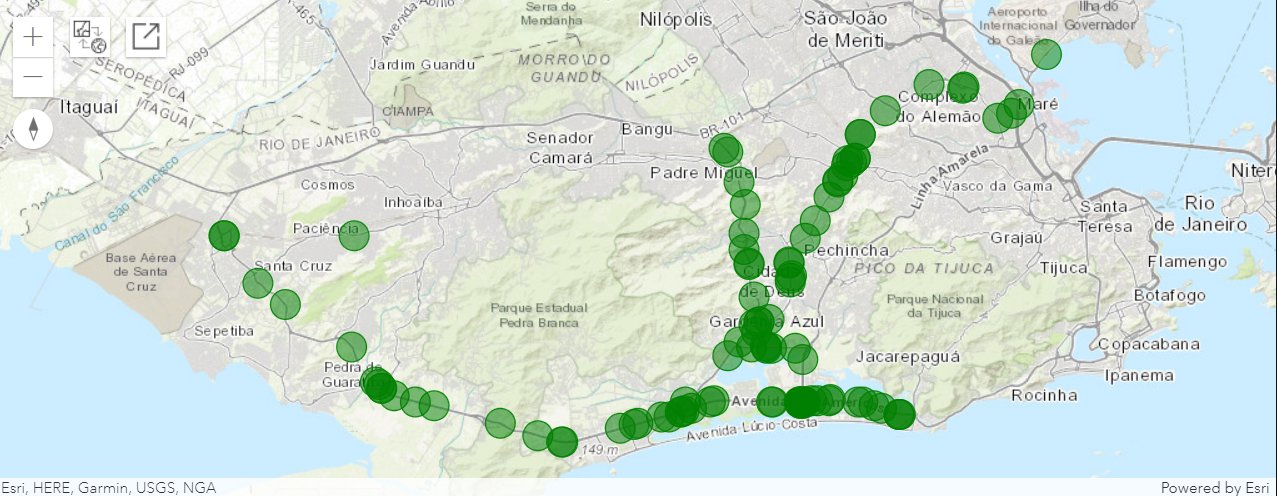

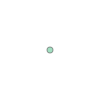

In [21]:
sdf.SHAPE.iloc[0] # visualizando um ponto específico

In [22]:
mapa = sdf.spatial.plot() # atribuindo a uma variável

In [23]:
mapa.extent # Pegando informações do mapa

{'spatialReference': {'wkid': 4326},
 'xmin': -43.683688,
 'ymin': -23.020945,
 'xmax': -43.231695,
 'ymax': -22.824697}

<h2>* Passo 5</h2>

<h3>Criando o Feature layer e publicando no AGOL (Arc GIS Online)</h3>

Para criar o Feature Layer, devemos chamar nosso spatial dataframe e atribuir seus valores, para assim então o publicar.

In [24]:
item = sdf.spatial.to_featurelayer(folder=None, title='Geolocalização Ônibus', tags='temp, onibus') # Note que definimos a uma variavel item

In [25]:
item # Visualizando, deve-se clicar no nome escolhido e será redirecionado ao AGOL

<Item title:"Geolocalização Ônibus" type:Feature Layer Collection owner:herbert.galindo@img.com.br_imagem>

Observe que foi criado o Feature Layer e publicado no AGOL, mas veja que o nome da camada não corresponde, por isso é interessante modificar.

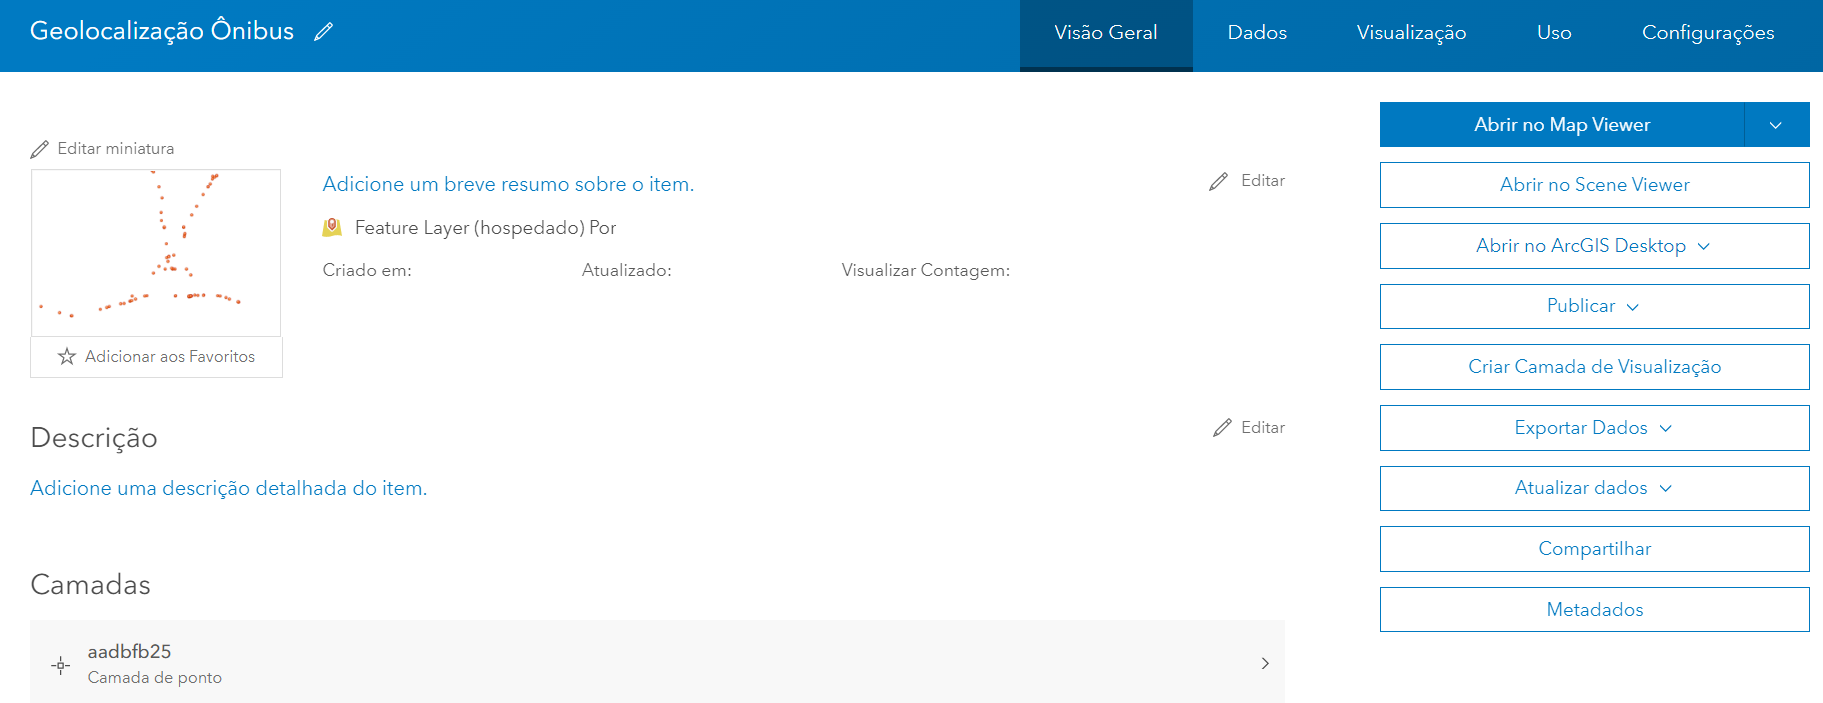

Irei apresentar duas Maneiras de modificar o nome da camada criada:

1. Modo manual:

Primeiro clique na camada, será redirecionado a outra página. Depois clique no símbolo do lápis e renomeie para o nome desejado e clique em salvar.

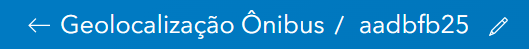

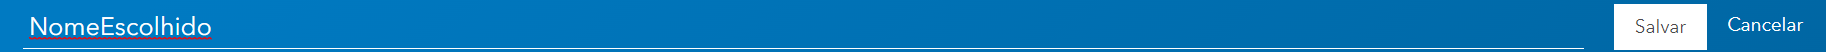

<span style="background-color:red; border-radius:4px; padding:2px">OBS:</span> Outros dados também podem ser modificados manualmente, após publicação, para isso clique no ícone do lápis no item desejado.

2. Modo Python

Primeiro crie uma variável e visualise sua layers

In [25]:
layer = item.layers[0] # Chame o arquivo publicado

In [26]:
layer # visualizando a url do featureLayer

<FeatureLayer url:"https://services.arcgis.com/qFQYQQeTXZSPY7Fs/arcgis/rest/services/aea8ce/FeatureServer/0">

Depois deve se checar a propriedade a qual será modificada com o uso do visualizador JSON.

In [27]:
JSON(f'{layer.manager.properties}') # com o json da para visualizar de forma melhor

C:\Users\herbert.galindo\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\IPython\core\display.py:904: UserWarning: JSON expects JSONable dict or list, not JSON strings
  warnings.warn("JSON expects JSONable dict or list, not JSON strings")


<IPython.core.display.JSON object>

Observe o que queremos mudar se encontra em name

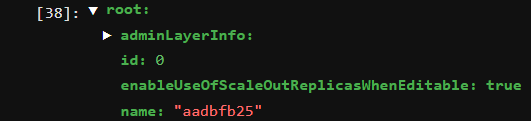

Use a variável criada e use manager.update_definition

In [28]:
layer.manager.update_definition({"name":"Geolocalização ônibus"}) # escolha o campo desejado para renomear

{'success': True}

In [29]:
item # Visualize novamente com a devida modificação

<Item title:"Geolocalização Ônibus" type:Feature Layer Collection owner:herbert.galindo@img.com.br_imagem>

<span style="background-color:red; border-radius:4px; padding:2px">OBS:</span> Outros dados também podem ser modificados via Python após publicação, para isso cheque a propriedade a qual deseje modificar com o visualizador JSON.

<h2>* Passo 6</h2>

<h3>Criando o FeatureClass em um GDB</h3>

Para criar o FeatureClass, devemos chamar nosso spatial dataframe e atribuir seus valores.

In [24]:
arcpy.env.overwriteOutput = True

In [25]:
gdb_name = 'temp.gdb' 

In [26]:
gdb_path = os.path.join(pasta, gdb_name) # Caminho relativo \temp.gdb

In [27]:
feature_class_path = os.path.join(gdb_path, 'Onibus') # Utiliza o gdb para criar um shapefile com nome escolhido

In [28]:
arcpy.CreateFileGDB_management(pasta,  gdb_name)

<Result 'C:\\Users\\herbert.galindo\\OneDrive - Imagem Geosistemas e Comercio LTDA\\Documentos\\ArcGIS\\Projects\\Tutoriais\\temp.gdb'>

In [29]:
temp = sdf.spatial.to_featureclass(location = feature_class_path, sanitize_columns=False)

<h2>* Passo 7</h2>

### UPDATE

Faremos update para atualizar informaçoes que desejamos através de duas formas: via API REST e via Python.

A API ArcGIS REST permite que você administre o Servidor ArcGIS programáticamente. Isso significa que você pode gerenciar completamente seu servidor usando qualquer estrutura que possa fazer solicitações HTTP.
A API está organizada em recursos e operações. Os recursos são entidades dentro do Servidor ArcGIS que possuem algumas informações e têm um estado bem definido. As operações atuam nesses recursos e atualizam suas informações ou estado. Os recursos e operações são hierárquicos e possuem localizadores universais de recursos exclusivos (URLs).

* Update por meio de API REST:

Para acessamos primeiramente, devemos abrir nosso projeto no AGOL(Arc Gis Online), rolar a tela para baixo e encontrar no lado inferior direito o nome URL e clicar em Visualizar.

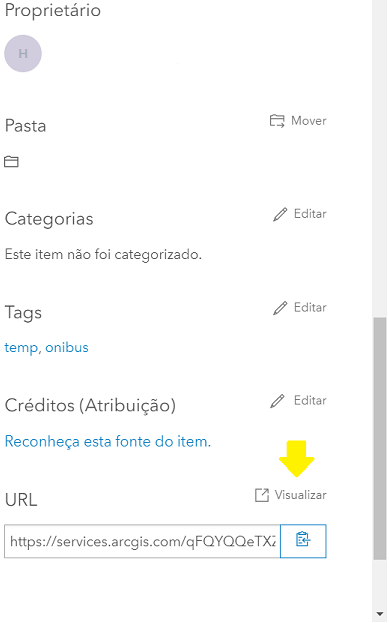

Seremos redirecionados a outra Página, observe que o nome da camada está situada em Layers, onde devemos entender que para aplicar modificações a rota é fundamental.

1. Apply edits na FeatureCollection(A coleção poderá ter layers [pontos, multipontos, linhas e polígonos] e tables)

Para fazer alterações clique no canto inferior em Apply Edits.

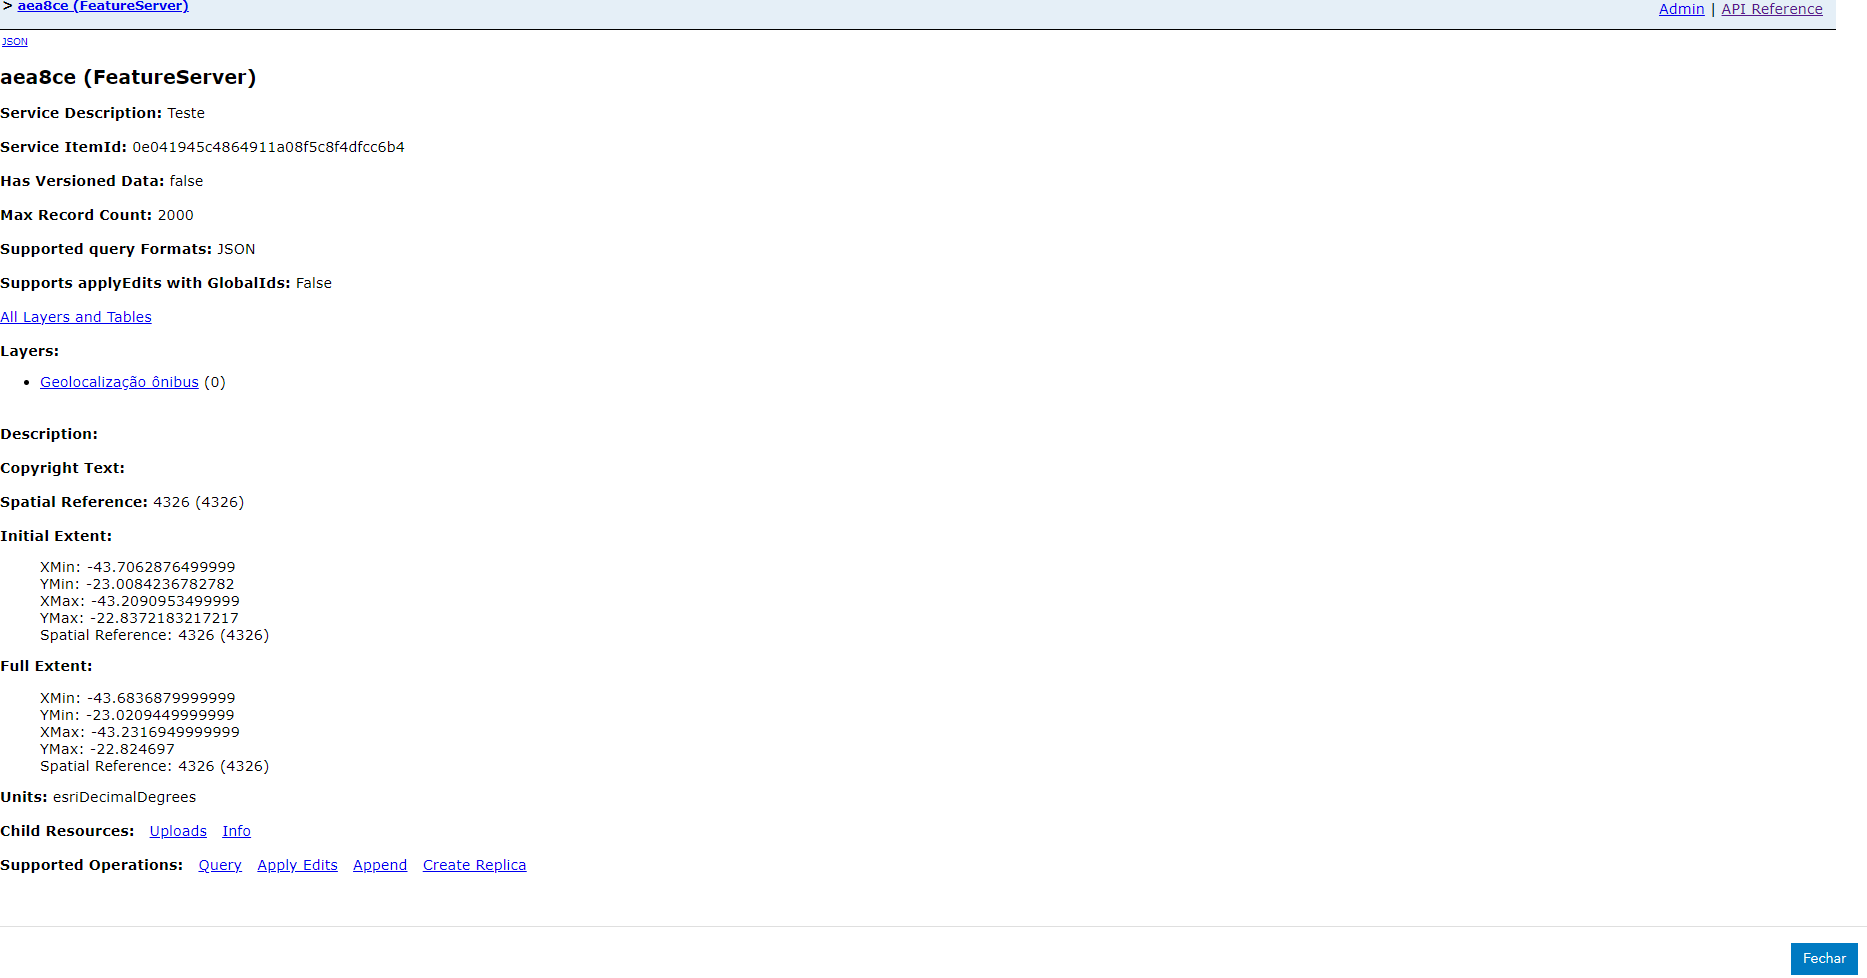

<span style="background-color:red; border-radius:4px; padding:2px">OBS:</span> Nesta tela, deverá ser inserido as suas modificações de acordo com a rota escolhida. A sua documentação é encontrada [AQUI](https://developers.arcgis.com/rest/services-reference/enterprise/apply-edits-feature-service-.htm)

Exemplo de como poderá ser utilizado:

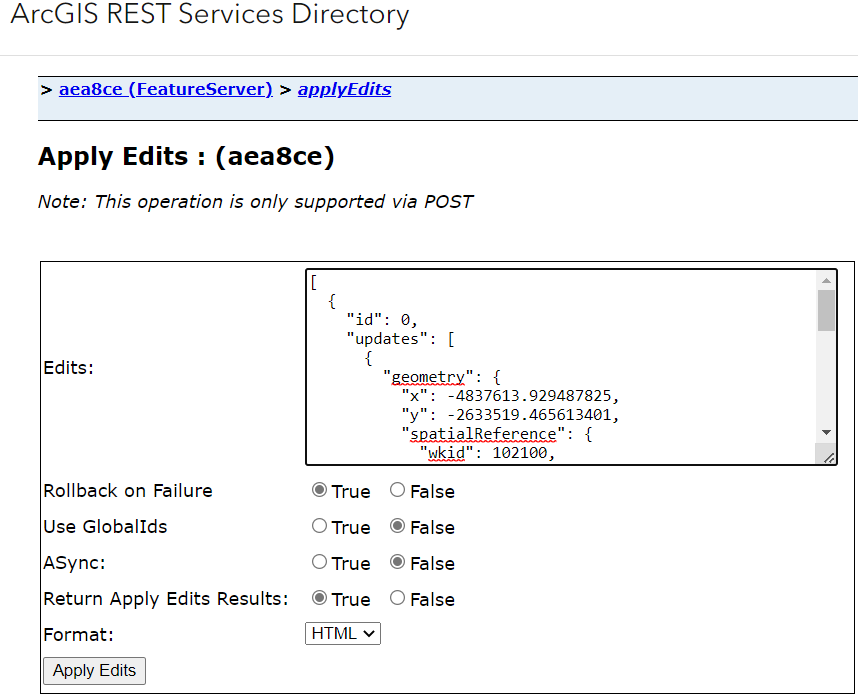

>[
  {
    "id": 0,
    "updates": [
      {
        "geometry": {
          "x": -4837613.929487825,
          "y": -2633519.465613401,
          "spatialReference": {
            "wkid": 102100,
            "latestWkid": 3857
          }
        },
        "attributes": {
          "OBJECTID": 1,
          "longitude": -43.456127,
          "latitude": -23.011583,
          "vei_nro_gestor": "50303",
          "direcao": "5",
          "velocidade": "51",
          "inicio_viagem": 1660910276000,
          "linha": "25A",
          "nome_linha": "TESTANDO_2",
          "nome_itinerario": "ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR)",
          "comunicacao": 1660921931000,
          "format_inicio": "19/08/2022",
          "format_comunicacao": "19/08/2022"
        }
      }
    ]
  }
]

Após suas modificações clique em Apply Edits e veja suas modificações no AGOL.

2. Apply edits na FeatureLayer ou FeatureTable

Para acessamos primeiramente, devemos abrir nosso projeto no AGOL(Arc Gis Online), rolar a tela para baixo e encontrar no lado inferior direito o nome URL e clicar em Visualizar.

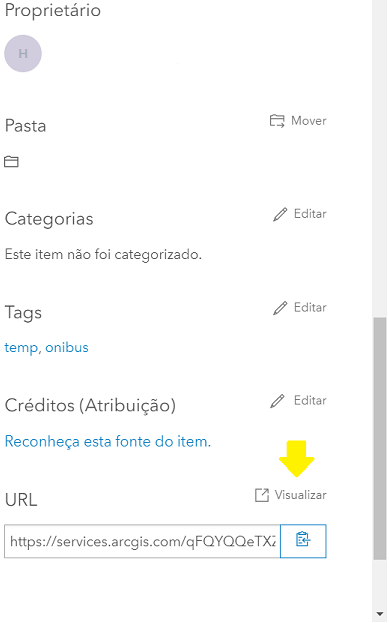

Seremos redirecionados a outra Página, observe que o nome da camada está situada em Layers, onde devemos entender que para aplicar modificações a rota é fundamental.

Clique na sua Layer. No exemplo é (Geolocalização ônibus)

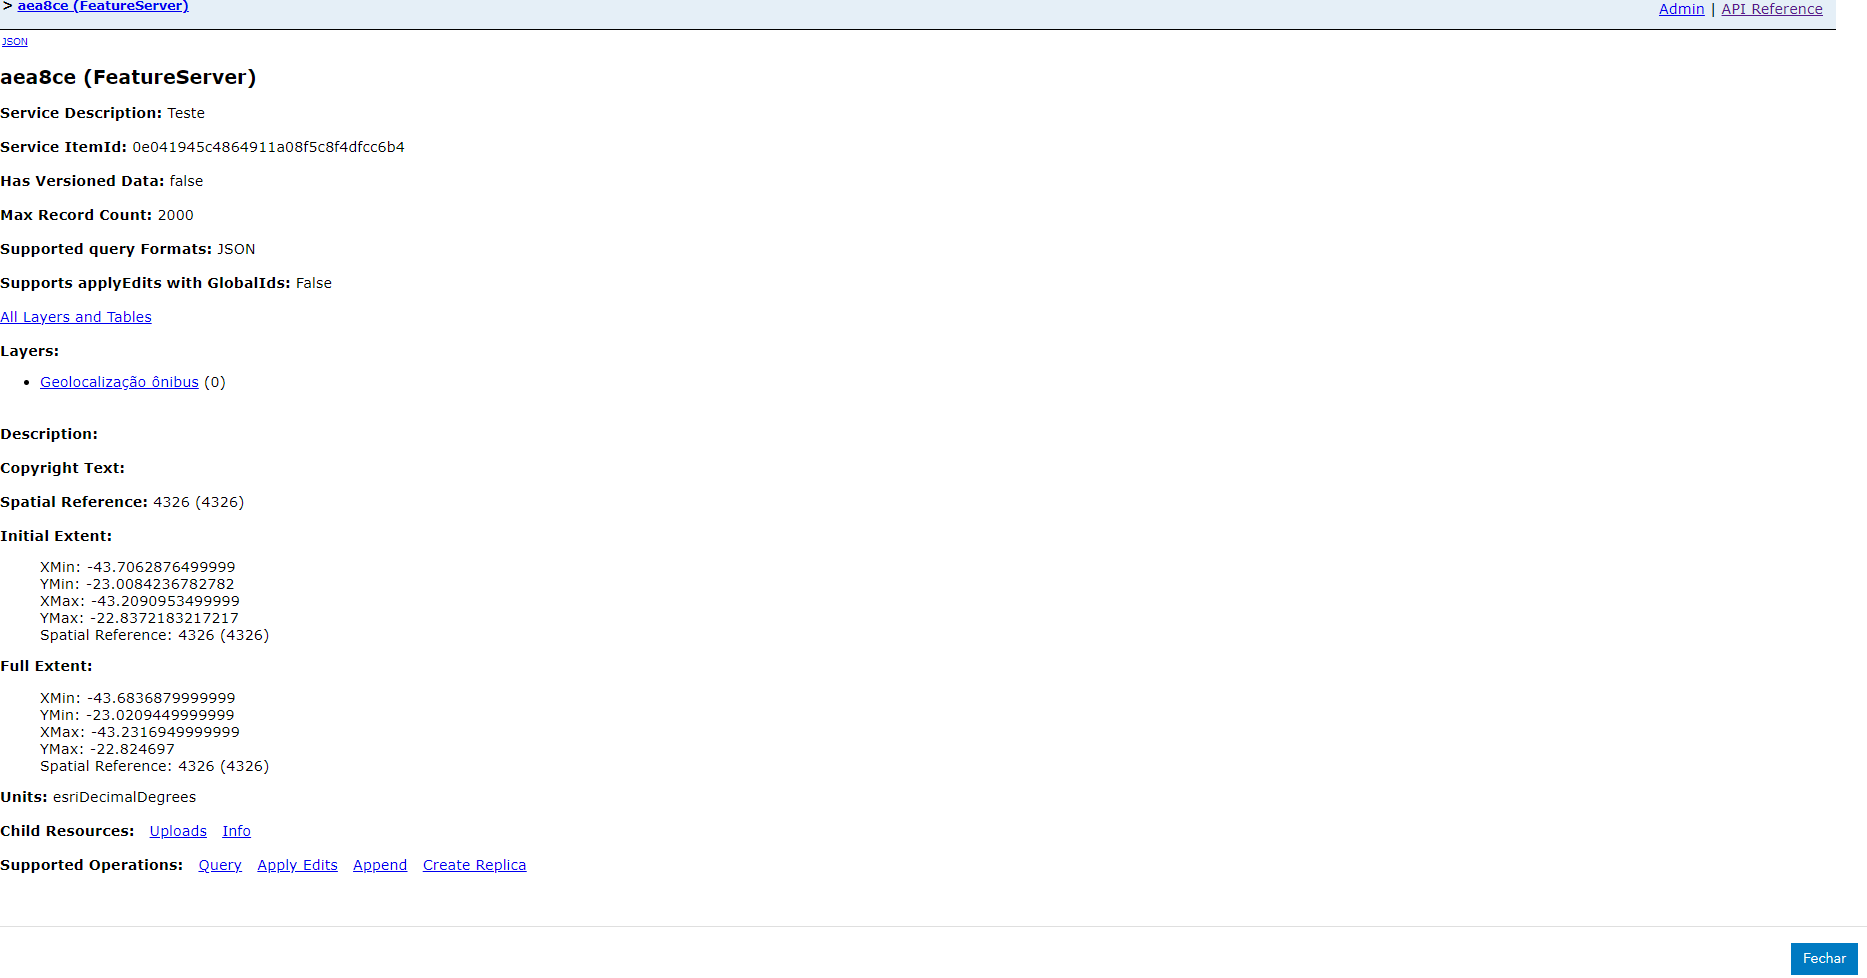

Copie a URL clicando com o botão direito no nome da layer. No exemplo(Geolocalização ônibus)

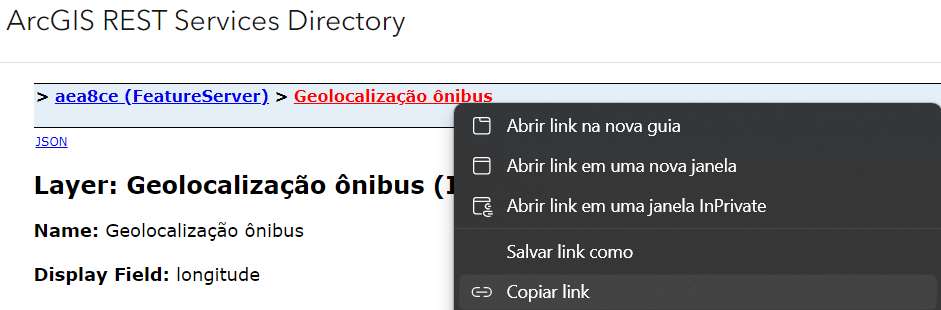

Cole a URL copiada e modifique a URL, antes da ?token digite:
>/applyEdits

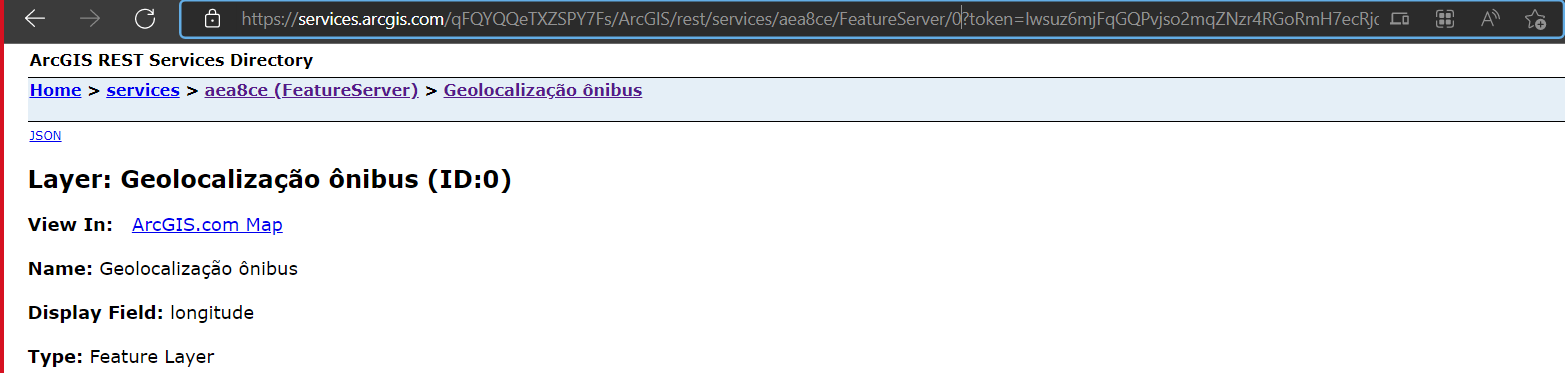

Observe que fomos redirecionados a rota de edição

<span style="background-color:red; border-radius:4px; padding:2px">OBS:</span> Nesta tela, deverá ser inserido as suas modificações de acordo com a rota escolhida. A sua documentação é encontrada [AQUI](https://developers.arcgis.com/rest/services-reference/enterprise/apply-edits-feature-service-layer-.htm)

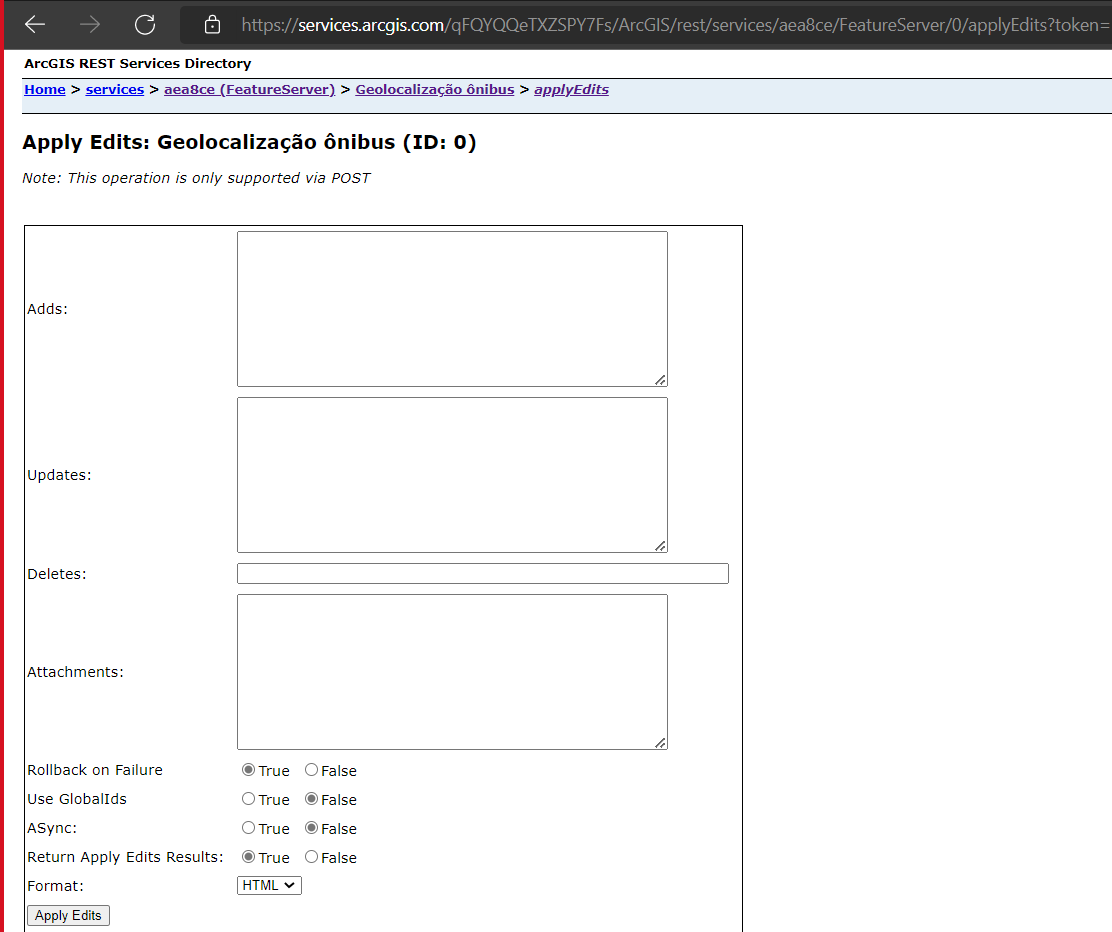

Exemplo de como poderá ser utilizado:
>{"geometry": {"x": -4837513.929487825, "y": -2633419.465613401, "spatialReference": {"wkid": 102100, "latestWkid": 3857}}, "attributes": {"OBJECTID": 1, "longitude": -43.456127, "latitude": -23.011583, "vei_nro_gestor": "50303", "direcao": "5", "velocidade": "51", "inicio_viagem": 1660910276000, "linha": "25A", "nome_linha": "TESTANDO_1", "nome_itinerario": "ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR)", "comunicacao": 1660921931000, "format_inicio": "19/08/2022", "format_comunicacao": "19/08/2022", "SHAPE": {"x": -4837513.929487825, "y": -2633419.465613401, "spatialReference": {"wkid": 102100, "latestWkid": 3857}}}}

Após suas modificações no update, clique em Apply Edits e veja suas modificações no AGOL.

* Update por meio de Python:

Por meio de Python existem 4 maneiras distintas, irei exemplificar duas delas.

1. Maneira 1:

Update via features

<Item title:"Geolocalização Ônibus" type:Feature Layer Collection owner:herbert.galindo@img.com.br_imagem>
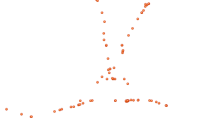

In [41]:
# Procure a camada criada no AGOL e insira seu id encontrado em sua URl
portal_item = gis.content.get('0e041945c4864911a08f5c8f4dfcc6b4')
portal_item

In [42]:
# Acessando a camada do featurelayer
ports_layer = portal_item.layers[0]
ports_layer

<FeatureLayer url:"https://services.arcgis.com/qFQYQQeTXZSPY7Fs/arcgis/rest/services/aea8ce/FeatureServer/0">

In [26]:
# Consultando os recursos
ports_fset = ports_layer.query()

In [27]:
# visualizando os recursos
ports_fset.sdf.head()

,OBJECTID,longitude,latitude,vei_nro_gestor,direcao,velocidade,inicio_viagem,linha,nome_linha,nome_itinerario,comunicacao,format_inicio,format_comunicacao,SHAPE
0,1,-43.456127,-23.011583,50303,5,51,2022-08-19 11:57:56,25A,TESTANDO,ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR),2022-08-19 15:12:11,19/08/2022,19/08/2022,"{""x"": -4837513.929487825, ""y"": -2633419.465613..."
1,2,-43.258598,-22.857085,44730,7,30,2022-08-19 14:43:26,42A,GALEAO X MADUREIRA (PARADOR),ITI IDA - 42A GALEAO X MADUREIRA (PARADOR),2022-08-19 15:11:47,19/08/2022,19/08/2022,"{""x"": -4815525.101790917, ""y"": -2614744.611087..."
2,3,-43.382703,-23.000645,50301,2,23,2022-08-19 11:45:35,25A,TESTANDO,ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR),2022-08-19 15:12:13,19/08/2022,19/08/2022,"{""x"": -4829340.407195815, ""y"": -2632096.639611..."
3,4,-43.231695,-22.824697,12707,4,49,2022-08-19 15:08:48,42A,GALEAO X MADUREIRA (PARADOR),ITI VOLTA - 42A GALEAO X MADUREIRA (PARADOR),2022-08-19 15:12:16,19/08/2022,19/08/2022,"{""x"": -4812530.273530105, ""y"": -2610832.426713..."
4,5,-43.372547,-22.940197,90007,4,48,2022-08-19 14:28:58,35A,MADUREIRA X JARDIM OCEANICO (PARADOR),ITI IDA - 35A MADUREIRA X JARDIM OCEANICO (PAR...,2022-08-19 15:11:51,19/08/2022,19/08/2022,"{""x"": -4828209.846447319, ""y"": -2624788.076679..."


In [37]:
# Verificando a propriedade do objeto que podem ser editados
ports_layer.properties.capabilities

'Query'

In [29]:
# atribuindo a uma variável
ports_features = ports_fset.features

In [30]:
# Selecine uma feature
sfo_feature = [f for f in ports_features if f.attributes['nome_linha']=='TESTANDO'][0]
sfo_feature.attributes

{'OBJECTID': 1,
 'longitude': -43.456127,
 'latitude': -23.011583,
 'vei_nro_gestor': '50303',
 'direcao': '5',
 'velocidade': '51',
 'inicio_viagem': 1660910276000,
 'linha': '25A',
 'nome_linha': 'TESTANDO',
 'nome_itinerario': 'ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR)',
 'comunicacao': 1660921931000,
 'format_inicio': '19/08/2022',
 'format_comunicacao': '19/08/2022',
 'SHAPE': {'x': -4837513.929487825,
  'y': -2633419.465613401,
  'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}}

In [66]:
# Como podemos ver acima, o atributo pode ser alterado. Vamos editar isso e armazená-lo como um novo objeto 'testando_1'
sfo_edit = sfo_feature
sfo_edit.attributes['nome_linha'] = 'TESTANDO_1'

In [69]:
#visualizando que foi criado um novo objeto modificando o anterior
display(sfo_edit)

{"geometry": {"x": -4837513.929487825, "y": -2633419.465613401, "spatialReference": {"wkid": 102100, "latestWkid": 3857}}, "attributes": {"OBJECTID": 1, "longitude": -43.456127, "latitude": -23.011583, "vei_nro_gestor": "50303", "direcao": "5", "velocidade": "51", "inicio_viagem": 1660910276000, "linha": "25A", "nome_linha": "TESTANDO_1", "nome_itinerario": "ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR)", "comunicacao": 1660921931000, "format_inicio": "19/08/2022", "format_comunicacao": "19/08/2022", "SHAPE": {"x": -4837513.929487825, "y": -2633419.465613401, "spatialReference": {"wkid": 102100, "latestWkid": 3857}}}}

In [70]:
# Visualizando a modificação
ports_fset.sdf.head()

,OBJECTID,longitude,latitude,vei_nro_gestor,direcao,velocidade,inicio_viagem,linha,nome_linha,nome_itinerario,comunicacao,format_inicio,format_comunicacao,SHAPE
0,1,-43.456127,-23.011583,50303,5,51,2022-08-19 11:57:56,25A,TESTANDO_1,ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR),2022-08-19 15:12:11,19/08/2022,19/08/2022,"{""x"": -4837513.929487825, ""y"": -2633419.465613..."
1,2,-43.258598,-22.857085,44730,7,30,2022-08-19 14:43:26,42A,GALEAO X MADUREIRA (PARADOR),ITI IDA - 42A GALEAO X MADUREIRA (PARADOR),2022-08-19 15:11:47,19/08/2022,19/08/2022,"{""x"": -4815525.101790917, ""y"": -2614744.611087..."
2,3,-43.382703,-23.000645,50301,2,23,2022-08-19 11:45:35,25A,TESTANDO,ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR),2022-08-19 15:12:13,19/08/2022,19/08/2022,"{""x"": -4829340.407195815, ""y"": -2632096.639611..."
3,4,-43.231695,-22.824697,12707,4,49,2022-08-19 15:08:48,42A,GALEAO X MADUREIRA (PARADOR),ITI VOLTA - 42A GALEAO X MADUREIRA (PARADOR),2022-08-19 15:12:16,19/08/2022,19/08/2022,"{""x"": -4812530.273530105, ""y"": -2610832.426713..."
4,5,-43.372547,-22.940197,90007,4,48,2022-08-19 14:28:58,35A,MADUREIRA X JARDIM OCEANICO (PARADOR),ITI IDA - 35A MADUREIRA X JARDIM OCEANICO (PAR...,2022-08-19 15:11:51,19/08/2022,19/08/2022,"{""x"": -4828209.846447319, ""y"": -2624788.076679..."


In [71]:
# Agora vamos enviar este objeto de recurso para o método e editar a camada de recurso original
update_result = ports_layer.edit_features(updates=[sfo_edit])
update_result

{'addResults': [],
 'updateResults': [{'objectId': 1,
   'uniqueId': 1,
   'globalId': None,
   'success': True}],
 'deleteResults': []}

2. Maneira 2:

In [24]:
# Primeiro devemos fazer os devidos imports
from arcgis.features import FeatureLayerCollection
from arcgis.features import FeatureLayer

* Rota do FeatureLayer

In [41]:
# Copiar a URL encontrada no Agol no canto inferior direito e atribuir a uma variável o FeatureLayer, atente a rota do id escolhida que no exemplo foi a 0.
fl = FeatureLayer('https://services.arcgis.com/qFQYQQeTXZSPY7Fs/arcgis/rest/services/aea8ce/FeatureServer/0', gis = gis)

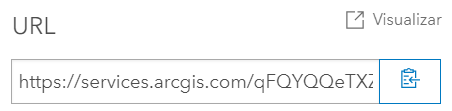

In [42]:
# Visualizando os dados e selecionando um dado aleatório, neste exemplo a velocidade maior que 50
fl.query(where="velocidade > 50").sdf.head()

,OBJECTID,longitude,latitude,vei_nro_gestor,direcao,velocidade,inicio_viagem,linha,nomeLinha,nomeItinerario,comunicacao,format_inicio,format_comunicacao,SHAPE
0,1,-43.456127,-23.011583,50303,5,51,2022-08-19 11:57:56,25A,TESTANDO_1,ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR),2022-08-19 15:12:11,19/08/2022,19/08/2022,"{""x"": -43.45612699999998, ""y"": -23.01158299999..."
1,5,-43.456127,-23.011583,50303,5,51,2022-08-19 11:57:56,25A,MADUREIRA X JARDIM OCEANICO (PARADOR),ITI IDA - 35A MADUREIRA X JARDIM OCEANICO (PAR...,2022-08-19 15:12:11,19/08/2022,19/08/2022,"{""x"": -43.37254699999994, ""y"": -22.94019699999..."
2,25,-43.498200,-23.020945,13423,2,58,2022-08-19 14:08:02,10,SANTA CRUZ X ALVORADA (EXPRESSO),ITI VOLTA - 10 SANTA CRUZ X ALVORADA (EXPRESSO),2022-08-19 15:12:13,19/08/2022,19/08/2022,"{""x"": -43.49819999999994, ""y"": -23.02094499999..."
3,30,-43.414255,-23.000343,86840,1,56,2022-08-19 14:35:23,13,MATO ALTO X ALVORADA (EXPRESSO),ITI IDA - 13 MATO ALTO X ALVORADA (EXPRESSO),2022-08-19 15:12:17,19/08/2022,19/08/2022,"{""x"": -43.41425499999991, ""y"": -23.00034299999..."
4,35,-43.590267,-22.997690,47012,6,59,2022-08-19 11:49:29,25A,MATO ALTO X ALVORADA (PARADOR),ITI VOLTA - 25A MATO ALTO X ALVORADA (PARADOR),2022-08-19 15:12:19,19/08/2022,19/08/2022,"{""x"": -43.590266999999926, ""y"": -22.9976899999..."


In [43]:
# atribuindo a uma variável
project_l = fl

In [44]:
# Consultando os recursos
pfl = project_l.query()

In [45]:
# Visualizando os dados
pfl.sdf.head()

,OBJECTID,longitude,latitude,vei_nro_gestor,direcao,velocidade,inicio_viagem,linha,nomeLinha,nomeItinerario,comunicacao,format_inicio,format_comunicacao,SHAPE
0,1,-43.456127,-23.011583,50303,5,51,2022-08-19 11:57:56,25A,TESTANDO_1,ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR),2022-08-19 15:12:11,19/08/2022,19/08/2022,"{""x"": -43.45612699999998, ""y"": -23.01158299999..."
1,2,-43.258598,-22.857085,44730,7,30,2022-08-19 14:43:26,42A,GALEAO X MADUREIRA (PARADOR),ITI IDA - 42A GALEAO X MADUREIRA (PARADOR),2022-08-19 15:11:47,19/08/2022,19/08/2022,"{""x"": -43.25859799999995, ""y"": -22.85708499999..."
2,3,-43.382703,-23.000645,50301,2,23,2022-08-19 11:45:35,25A,TESTANDO_2,ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR),2022-08-19 15:12:13,19/08/2022,19/08/2022,"{""x"": -43.382702999999935, ""y"": -23.0006449999..."
3,4,-43.231695,-22.824697,12707,4,49,2022-08-19 15:08:48,42A,GALEAO X MADUREIRA (PARADOR),ITI VOLTA - 42A GALEAO X MADUREIRA (PARADOR),2022-08-19 15:12:16,19/08/2022,19/08/2022,"{""x"": -43.231694999999945, ""y"": -22.8246969999..."
4,5,-43.456127,-23.011583,50303,5,51,2022-08-19 11:57:56,25A,MADUREIRA X JARDIM OCEANICO (PARADOR),ITI IDA - 35A MADUREIRA X JARDIM OCEANICO (PAR...,2022-08-19 15:12:11,19/08/2022,19/08/2022,"{""x"": -43.37254699999994, ""y"": -22.94019699999..."


In [10]:
# Verificando a propriedade do objeto que podem ser editados
project_l.properties.capabilities

'Query'

In [11]:
# atribuindo a uma variável
ports_features = pfl.features

In [12]:
# Selecine uma feature
sfo_feature = [f for f in ports_features if f.attributes['nomeLinha']=='MATO ALTO X ALVORADA (PARADOR)'][0]
sfo_feature.attributes

{'OBJECTID': 3,
 'longitude': -43.382703,
 'latitude': -23.000645,
 'vei_nro_gestor': 50301,
 'direcao': 2,
 'velocidade': 23,
 'inicio_viagem': 1660909535000,
 'linha': '25A',
 'nomeLinha': 'MATO ALTO X ALVORADA (PARADOR)',
 'nomeItinerario': 'ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR)',
 'comunicacao': 1660921933000,
 'format_inicio': '19/08/2022',
 'format_comunicacao': '19/08/2022',
 'SHAPE': {'x': -43.382702999999935,
  'y': -23.000644999999906,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

In [13]:
# Como podemos ver acima, o atributo pode ser alterado. Vamos editar isso e armazená-lo como um novo objeto
sfo_edit = sfo_feature
sfo_edit.attributes['nomeLinha'] = 'TESTANDO_2'

In [14]:
display(sfo_feature)

{"geometry": {"x": -43.382702999999935, "y": -23.000644999999906, "spatialReference": {"wkid": 4326, "latestWkid": 4326}}, "attributes": {"OBJECTID": 3, "longitude": -43.382703, "latitude": -23.000645, "vei_nro_gestor": 50301, "direcao": 2, "velocidade": 23, "inicio_viagem": 1660909535000, "linha": "25A", "nomeLinha": "TESTANDO_2", "nomeItinerario": "ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR)", "comunicacao": 1660921933000, "format_inicio": "19/08/2022", "format_comunicacao": "19/08/2022", "SHAPE": {"x": -43.382702999999935, "y": -23.000644999999906, "spatialReference": {"wkid": 4326, "latestWkid": 4326}}}}

In [15]:
# Vizualizando as modificações
pfl.sdf.head()

,OBJECTID,longitude,latitude,vei_nro_gestor,direcao,velocidade,inicio_viagem,linha,nomeLinha,nomeItinerario,comunicacao,format_inicio,format_comunicacao,SHAPE
0,1,-43.456127,-23.011583,50303,5,51,2022-08-19 11:57:56,25A,TESTANDO_1,ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR),2022-08-19 15:12:11,19/08/2022,19/08/2022,"{""x"": -43.45612699999998, ""y"": -23.01158299999..."
1,2,-43.258598,-22.857085,44730,7,30,2022-08-19 14:43:26,42A,GALEAO X MADUREIRA (PARADOR),ITI IDA - 42A GALEAO X MADUREIRA (PARADOR),2022-08-19 15:11:47,19/08/2022,19/08/2022,"{""x"": -43.25859799999995, ""y"": -22.85708499999..."
2,3,-43.382703,-23.000645,50301,2,23,2022-08-19 11:45:35,25A,TESTANDO_2,ITI IDA - 25A MATO ALTO X ALVORADA (PARADOR),2022-08-19 15:12:13,19/08/2022,19/08/2022,"{""x"": -43.382702999999935, ""y"": -23.0006449999..."
3,4,-43.231695,-22.824697,12707,4,49,2022-08-19 15:08:48,42A,GALEAO X MADUREIRA (PARADOR),ITI VOLTA - 42A GALEAO X MADUREIRA (PARADOR),2022-08-19 15:12:16,19/08/2022,19/08/2022,"{""x"": -43.231694999999945, ""y"": -22.8246969999..."
4,5,-43.456127,-23.011583,50303,5,51,2022-08-19 11:57:56,25A,MADUREIRA X JARDIM OCEANICO (PARADOR),ITI IDA - 35A MADUREIRA X JARDIM OCEANICO (PAR...,2022-08-19 15:12:11,19/08/2022,19/08/2022,"{""x"": -43.37254699999994, ""y"": -22.94019699999..."


In [16]:
# Agora vamos enviar este objeto de recurso para o método e editar a camada de recurso original
update_r = project_l.edit_features(updates=[sfo_edit])
update_r

{'addResults': [],
 'updateResults': [{'objectId': 3,
   'uniqueId': 3,
   'globalId': None,
   'success': True}],
 'deleteResults': []}

* Rota do FeatureLayerCollection

Para entrar na rota, é necessário acessar as layers e as tables

In [52]:
# Copiar a URL encontrada no Agol no canto inferior direito e atribuir a uma variável o FeatureLayerCollection.
flc = FeatureLayerCollection('https://services.arcgis.com/qFQYQQeTXZSPY7Fs/arcgis/rest/services/aea8ce/FeatureServer/', gis = gis)

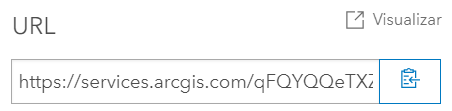

In [56]:
flc.layers

[<FeatureLayer url:"https://services.arcgis.com/qFQYQQeTXZSPY7Fs/arcgis/rest/services/aea8ce/FeatureServer/0">]

In [94]:
flc.tables

[]

<span style="background-color:red; border-radius:4px; padding:2px">OBS:</span> A partir disto voltaremos ao exemplo da Maneira 2.

In [2]:
# Ver forma de referenciar a outro tópico

3. Maneira 3:

Update via FeatureSet

In [46]:
# Copiar a URL encontrada no Agol no canto inferior direito e atribuir a uma variável o FeatureLayer, atente a rota do id escolhida que no exemplo foi a 0.
fl = FeatureLayer('https://services.arcgis.com/qFQYQQeTXZSPY7Fs/arcgis/rest/services/aea8ce/FeatureServer/0', gis = gis)

In [47]:
# Requisitamos o objectid 4 e seu campo nomeLinha
sdf = fl.query('objectid=4', out_fields=['OBJECTID', 'nomeLinha']).sdf

In [48]:
# Visualizando a requisição
sdf

,OBJECTID,nomeLinha,SHAPE
0,4,,"{""x"": -43.231694999999945, ""y"": -22.8246969999..."


In [49]:
# Modificando o objeto
sdf.nomeLinha = 'TESTANDO_4'

In [50]:
# Visualizando a modificação
sdf

,OBJECTID,nomeLinha,SHAPE
0,4,TESTANDO_4,"{""x"": -43.231694999999945, ""y"": -22.8246969999..."


In [51]:
# Chamamos o método espacial do featureset
fs = sdf.spatial.to_featureset()

In [52]:
# Agora vamos enviar este objeto de recurso para o método e editar a camada original
fl.edit_features(updates=fs)

{'addResults': [],
 'updateResults': [{'objectId': 4,
   'uniqueId': 4,
   'globalId': None,
   'success': True}],
 'deleteResults': []}

In [53]:
# Requisitando novamente e vendo que foi modificado
fl.query('objectid=4', out_fields=['OBJECTID', 'nomeLinha']).sdf

,OBJECTID,nomeLinha,SHAPE
0,4,TESTANDO_4,"{""x"": -43.231694999999945, ""y"": -22.8246969999..."


4. Maneira 4:

Update via Arcpy

In [64]:
# Copiar a URL encontrada no Agol no canto inferior direito e atribuir a arcpy.env.workspace
arcpy.env.workspace = 'https://services.arcgis.com/qFQYQQeTXZSPY7Fs/arcgis/rest/services/aea8ce/FeatureServer/0'

In [50]:
# Atribuir a uma variável
fc = arcpy.env.workspace

In [65]:
# Especificar os pontos escolhidos
fields = ['objectid', 'nomeLinha', 'velocidade', 'SHAPE@XY']

Primeiro devemos usar o SearchCursor e chamar a feature e os campos escolhidos

In [66]:
with arcpy.da.SearchCursor(fc, fields) as cursor:
    for row in cursor:
        print(row)

(1, 'MATO ALTO X ALVORADA (PARADOR)', 51, (-43.45612699999998, -23.011582999999973))
(2, 'GALEAO X MADUREIRA (PARADOR)', 30, (-43.25859799999995, -22.857084999999927))
(3, 'MATO ALTO X ALVORADA (PARADOR)', 23, (-43.382702999999935, -23.000644999999963))
(4, 'GALEAO X MADUREIRA (PARADOR)', 49, (-43.231694999999945, -22.824696999999958))
(5, 'MADUREIRA X JARDIM OCEANICO (PARADOR)', 48, (-43.37254699999994, -22.940196999999955))
(6, 'ALVORADA X MADUREIRA (EXPRESSO)', 0, (-43.346341999999936, -22.88908799999996))
(7, 'PENHA X ALVORADA (EXPRESSO)', 0, (-43.36721199999994, -23.001454999999964))
(8, 'TERMINAL SULACAP X ALVORADA (EXPRESSO)', 18, (-43.364634999999964, -23.000726999999927))
(9, 'SANTA CRUZ X SALVADOR ALLENDE (EXPRESSO)', 19, (-43.68368799999996, -22.916377999999952))
(10, 'PINGO DAGUA X SALVADOR ALLENDE (EXPRESSO)', 47, (-43.511259999999936, -23.017717999999945))
(11, 'PENHA X ALVORADA (EXPRESSO)', 45, (-43.29664999999994, -22.839999999999975))
(12, 'SANTA CRUZ X SALVADOR ALLEND

Agora usaremos o UpdateCursor onde sua documentação pode ser encontrada [AQUI](https://pro.arcgis.com/en/pro-app/latest/arcpy/data-access/updatecursor-class.htm)

Observe que podemos chamar um unico objeto ou diversos objetos e modificá-los. No exemplo abaixo, foi chamado um objeto de nomeLinha e um objeto de velocidade maior que 20. Onde todos os objetos que possuem o nome estabelecido em nomeLinha e que eram maiores que velocidade 20, foram modificados.

In [67]:
with arcpy.da.UpdateCursor(fc,['nomeLinha', 'velocidade'], where_clause="nomeLinha='MATO ALTO X ALVORADA (PARADOR)' AND velocidade > 20") as cursor:
    for row in cursor:
        print(f'Modificaremos a linha {row}')
        row[0] = "TESTANDO"     
        cursor.updateRow(row)
        print(f'Linha modificada {row}')

Modificaremos a linha ['MATO ALTO X ALVORADA (PARADOR)', 51]
Linha modificada ['TESTANDO', 51]
Modificaremos a linha ['MATO ALTO X ALVORADA (PARADOR)', 23]
Linha modificada ['TESTANDO', 23]
Modificaremos a linha ['MATO ALTO X ALVORADA (PARADOR)', 47]
Linha modificada ['TESTANDO', 47]
Modificaremos a linha ['MATO ALTO X ALVORADA (PARADOR)', 36]
Linha modificada ['TESTANDO', 36]
Modificaremos a linha ['MATO ALTO X ALVORADA (PARADOR)', 59]
Linha modificada ['TESTANDO', 59]
Modificaremos a linha ['MATO ALTO X ALVORADA (PARADOR)', 34]
Linha modificada ['TESTANDO', 34]
Modificaremos a linha ['MATO ALTO X ALVORADA (PARADOR)', 54]
Linha modificada ['TESTANDO', 54]
